## Rung 5

(13+ mins)

### HAPI Client

**TODO: we might need to shorten this task for time**

#### Task 44: Interpolating Time
 - **Description:** For analysis, it is often useful to place two datasets that have different timestamps on the same time grid. There are many ways to do this, for example,
     - Convert the timestamps in the NumPy `ndarray` returned by `hapi()` into integers, create a 1-D array of time integers to interpolate on to, and then either write your own interpolation function (not recommended) or use an interpolation function in [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) or [SciPy](https://docs.scipy.org/doc/scipy/reference/interpolate.html). An example of converting HAPI timestamps to datetime objects was given in [HAPI_02.ipynb#Time-Representation](https://github.com/heliophysicsPy/summer-school/blob/3d500979226eee45ad506e6e4a0d67d0f37f5715/hapi-tutorial/HAPI_02.ipynb#Time-Representation); one can use [`datetime` methods](https://docs.python.org/3/library/datetime.html) to convert datetime objects into integers.
    - Place data in a Pandas `DataFrame` and use its interpolation methods (an example of placing data into a Pandas DataFrame was given in [HAPI_02.ipynb#Convert-to-Pandas-DataFrame](https://github.com/heliophysicsPy/summer-school/blob/3d500979226eee45ad506e6e4a0d67d0f37f5715/hapi-tutorial/HAPI_02.ipynb#Convert-to-Pandas-DataFrame)).
    - In the [SpacePy](https://github.com/heliophysicsPy/summer-school/blob/main/spacepy-tutorial/SpacePy%20-%20MMS%20Ephemeris.md) tutorial (search on `tb.inter`), you used the `interpol` function in `spacepy.toolbox` to perform interpolation.

Starting with the following program that reads datasets from two different data servers, use any library (or your own code) to

 1. write a program that interpolates `data2` on to the time grid of `data0` and
 2. create a table or plot that allows one to visually compare the interpolated values with the given values.
 3. write a program that averages `data0` into 1-hour time bins and compares the result with the contents of `data2`.

 ```
from hapiclient import hapi, hapitime2datetime

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data0, meta0 = hapi(server, dataset, parameters, start, stop)
print('data0 = ')
print(data0)

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H2_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data2, meta2 = hapi(server, dataset, parameters, start, stop)
print('\ndata2 = ')
print(data2)
 ```
 - **Expected Learning Outcome:** How to interpolate time values.
 - **Hints:** Use one of the interpolation approaches mentioned in the description.

(From "[Interpolating Time](https://github.com/heliophysicsPy/summer-school/blob/3d500979226eee45ad506e6e4a0d67d0f37f5715/hapi-tutorial/HAPI_04.ipynb)")

data0 = 
[(b'1998-02-04T00:00:31.000Z', -1.00000000e+31)
 (b'1998-02-04T00:01:35.000Z', -1.00000000e+31)
 (b'1998-02-04T00:02:39.000Z', -1.00000000e+31) ...
 (b'1998-02-05T23:57:19.000Z',  1.44819002e+01)
 (b'1998-02-05T23:58:23.000Z',  1.49483004e+01)
 (b'1998-02-05T23:59:27.000Z',  1.35783005e+01)]

data2 = 
[(b'1998-02-04T00:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T01:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T02:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T03:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T04:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T05:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T06:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T07:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T08:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T09:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T10:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T11:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T12:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T13:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T1

/tmp/ipykernel_757/3202174192.py:62: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  data2_numpy_interpolated = np.array(data2_numpy_interpolated, dtype=[('Time', 'datetime64[ms]'), ('Value', float)])
/tmp/ipykernel_757/3202174192.py:65: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  data2_spacepy_interpolated = np.array(data2_spacepy_interpolated, dtype=[('Time', 'datetime64[ms]'), ('Value', float)])


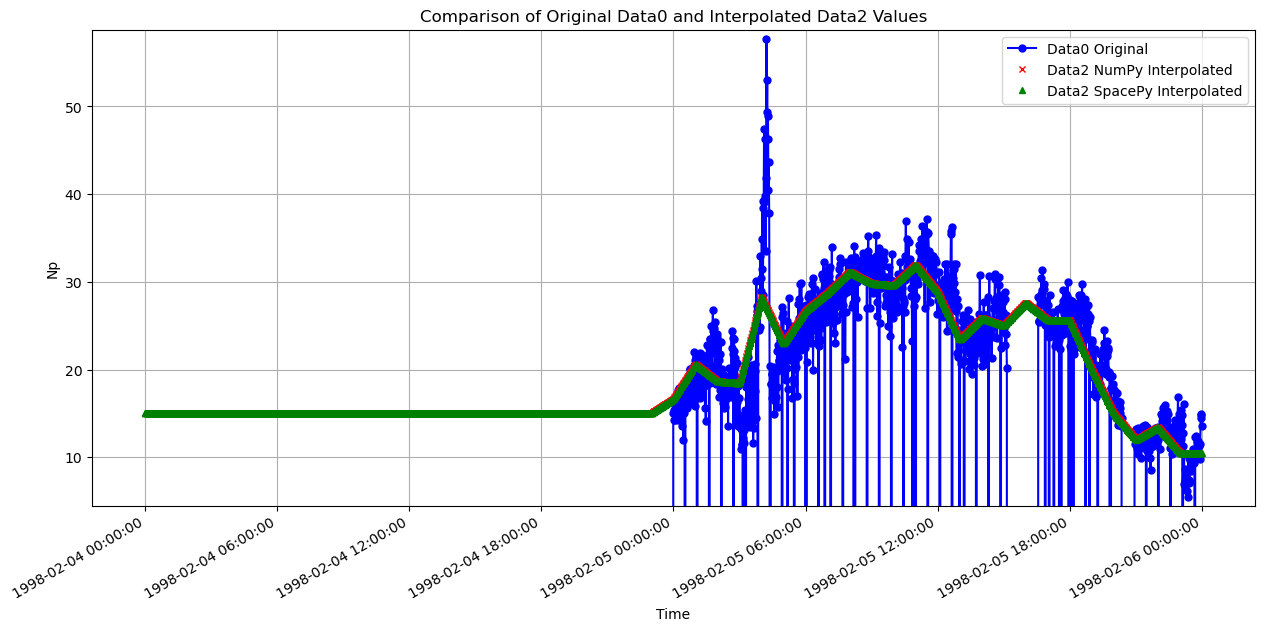

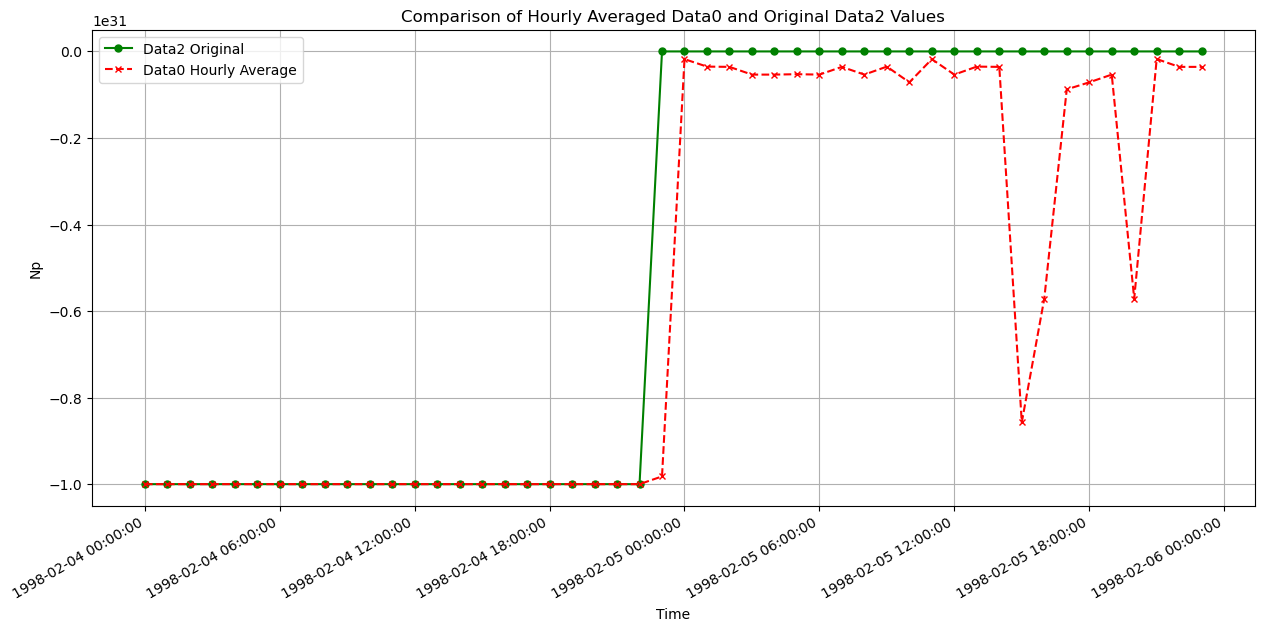

In [1]:
# Idealized developer minutes: 15?

from hapiclient import hapi, hapitime2datetime

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data0, meta0 = hapi(server, dataset, parameters, start, stop)
print('data0 = ')
print(data0)

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H2_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data2, meta2 = hapi(server, dataset, parameters, start, stop)
print('\ndata2 = ')
print(data2)


# -------- Helper functions to interpolate with (1) NumPy and (2) SpacePy ------------------------
#          (Note: fill: "-1.0E31" used for AC_H0_SWE & AC_H2_SWE datasets)

import numpy as np
from spacepy.toolbox import interpol
from datetime import datetime

def interpolate_with_numpy(newx, x, y):
    y_masked = np.ma.masked_values(y, -1.e+31)  # Mask bad data (-1.e+31)
    return np.interp(newx, x, y_masked.filled(np.nan), left=np.nan, right=np.nan)

def interpolate_with_spacepy(newx, x, y):
    return interpol(newx, x, y, baddata=-1.e+31)

# -------- (1) Perform the interpolation ------------------------

def convert_timestamps(data):
    return hapitime2datetime(data['Time'])

# Convert timestamps
timestamps0 = convert_timestamps(data0)
timestamps2 = convert_timestamps(data2)

# Extract data values
data_values0 = np.array([value for _, value in data0])
data_values2 = np.array([value for _, value in data2])

# Convert datetime objects to Unix timestamps
x0_unix = np.array([t.timestamp() for t in timestamps0])
x2_unix = np.array([t.timestamp() for t in timestamps2])

# Perform the interpolation of data2 onto the time grid of data0
numpy_interpolated = interpolate_with_numpy(x0_unix, x2_unix, data_values2)
spacepy_interpolated = interpolate_with_spacepy(x0_unix, x2_unix, data_values2)

data2_numpy_interpolated = [(timestamp, numpy_interpolated[i]) for i, timestamp in enumerate(data0['Time'])]
data2_numpy_interpolated = np.array(data2_numpy_interpolated, dtype=[('Time', 'datetime64[ms]'), ('Value', float)])

data2_spacepy_interpolated = [(timestamp, spacepy_interpolated[i] if not hasattr(spacepy_interpolated, 'mask') or not spacepy_interpolated.mask[i] else np.nan) for i, timestamp in enumerate(data0['Time'])]
data2_spacepy_interpolated = np.array(data2_spacepy_interpolated, dtype=[('Time', 'datetime64[ms]'), ('Value', float)])

# # Print the interpolated data2
# print('\ndata2 (NumPy Interpolated) = ')
# print(data2_numpy_interpolated)

# print('\ndata2 (SpacePy Interpolated) = ')
# print(data2_spacepy_interpolated)

# -------- (2) Plot interpolated data2 ------------------------

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Time' bytes to datetime for plotting
data0_times = mdates.datestr2num([t.decode('utf-8') for t in data0['Time']])

plt.figure(figsize=(15, 7))

# Plot the original data0 values
plt.plot(data0_times, data0['Np'], label='Data0 Original', marker='o', linestyle='-', color='blue', markersize=5)

# Plot the NumPy interpolated data2 values
plt.plot(data0_times, data2_numpy_interpolated['Value'], label='Data2 NumPy Interpolated', marker='x', linestyle='None', color='red', markersize=5)

# Plot the SpacePy interpolated data2 values
plt.plot(data0_times, data2_spacepy_interpolated['Value'], label='Data2 SpacePy Interpolated', marker='^', linestyle='None', color='green', markersize=5)

plt.title('Comparison of Original Data0 and Interpolated Data2 Values')
plt.xlabel('Time')
plt.ylabel('Np')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()  # Auto-rotate date labels

# Adjust y-axis limits to exclude extreme values (bad data marked by -1e31)
valid_data0_indices = data0['Np'] > -1e31
plt.ylim(np.min(data0['Np'][valid_data0_indices]) - 1, np.max(data0['Np'][valid_data0_indices]) + 1)

plt.show()

# -------- (3) data0 averaged to 1-hour time bins ------------------------

import pandas as pd

data0_df = pd.DataFrame({
    'Time': [mdates.num2date(mdates.datestr2num(t.decode('utf-8'))) for t in data0['Time']],
    'Np': data0['Np']
})

data0_df.set_index('Time', inplace=True)

# Resample data0 into 1-hour bins and compute the mean of each bin
data0_hourly_avg = data0_df.resample('1H').mean()

data2_df = pd.DataFrame({
    'Time': [mdates.num2date(mdates.datestr2num(t.decode('utf-8'))) for t in data2['Time']],
    'Np': data2['Np']
})

data2_df.set_index('Time', inplace=True)

comparison_df = pd.DataFrame({
    'data0_hourly_avg': data0_hourly_avg['Np'],
    'data2_original': data2_df['Np']
})

# Print the comparison DataFrame
# print(comparison_df)

plt.figure(figsize=(15, 7))

# Plot data2 original values
plt.plot(data2_df.index, data2_df['Np'], label='Data2 Original', marker='o', linestyle='-', color='green', markersize=5)

# Plot data0 hourly averaged values
plt.plot(data0_hourly_avg.index, data0_hourly_avg['Np'], label='Data0 Hourly Average', marker='x', linestyle='--', color='red', markersize=5)

plt.title('Comparison of Hourly Averaged Data0 and Original Data2 Values')
plt.xlabel('Time')
plt.ylabel('Np')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()  # Auto-rotate date labels

plt.show()



### SunPy

#### Task 45: Comparing Perspectives: Reproject SDO AIA and STEREO EUVI Solar Images
 - **Description:** As solar phenomena are often studied from multiple viewpoints to gain a three-dimensional understanding, your task is to use SunPy and the `reproject` package to fetch and plot images of the sun from both SDO AIA and STEREO EUVI, showing the solar limb from both perspectives on both images, and to reproject their views. Do the following:

1. Download an image of the sun in the 193 Ångstrom wavelength from SDO AIA at the timestamp 2012-06-01/00:00:07.
2. Download an image of the sun in the 195 Ångstrom wavelength from STEREO EUVI at the timestamp 2012-06-01/00:05:30.
3. Resample the images to 512x512 pixels to reduce memory consumption.
4. Plot them side by side, highlighting the solar limb as seen by both instruments in each.
5. Use the `reproject` library to reproject the EUVI image to the viewpoint of the AIA.
6. And vice versa, reproject the AIA image to the viewpoint of the EUVI (effectively showing how each spacecraft would see the sun's region covered by the other).
7. Plot the reprojected images side by side for comparison.
 - **Expected Learning Outcome:** How to download solar images, take two spacecraft with different angles and reproject their views, and draw solar limb on images.
 - **Hints:** Use SunPy's Fido interface to fetch the images, and the `reproject_to()` method to reproject one image to the other's perspective. Draw the solar limb in each plot for both the original and reprojected images to visualize the changes in perspective. Images as seen from the other's perspective will appear as partial slices of the sphere that is the sun.

Files Downloaded:   0%|          | 0/28 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


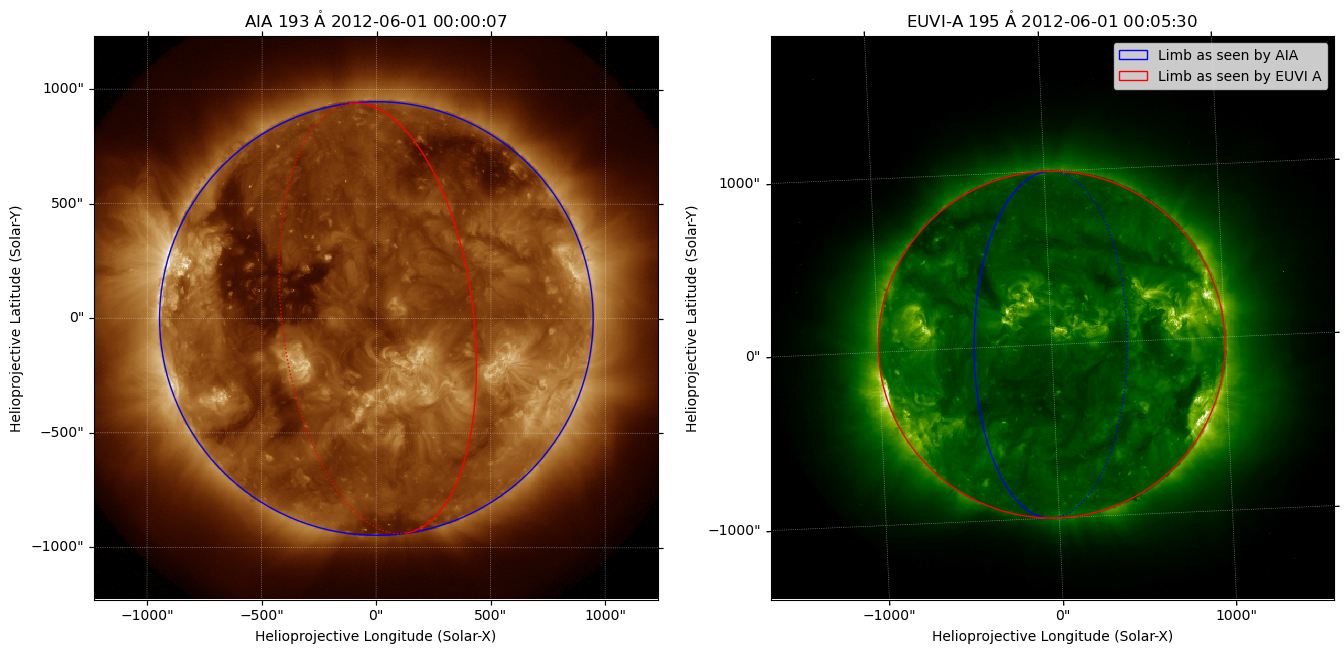

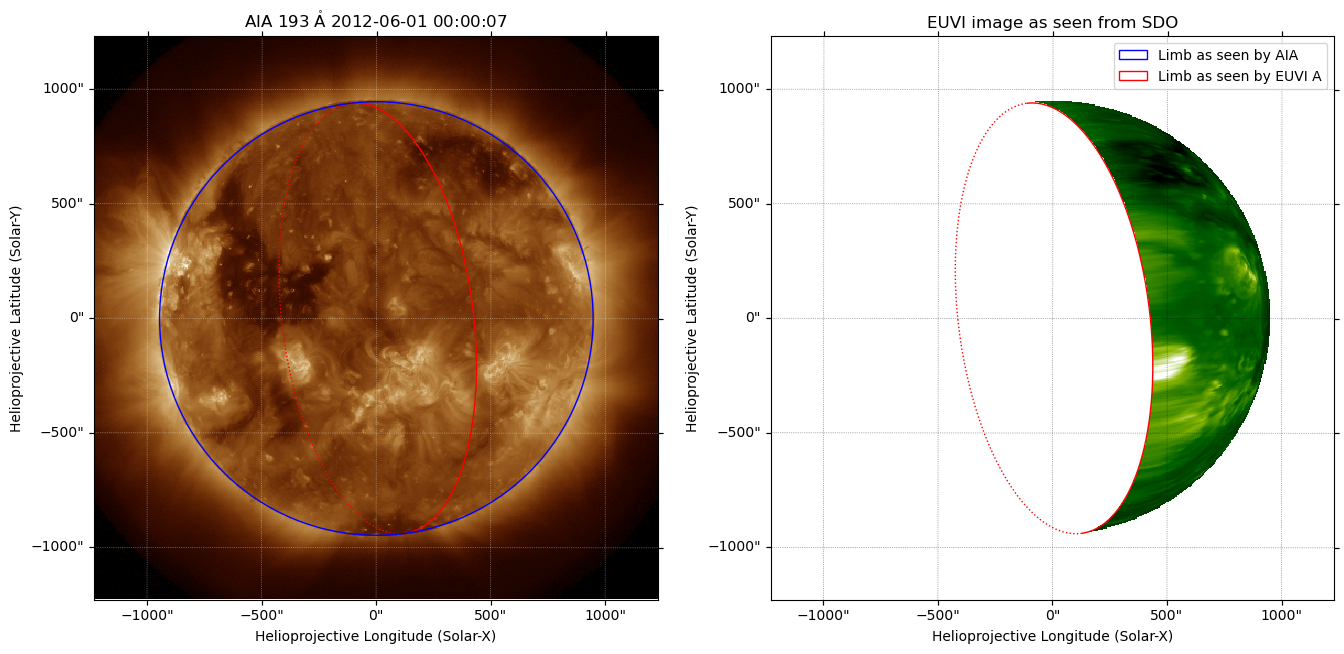

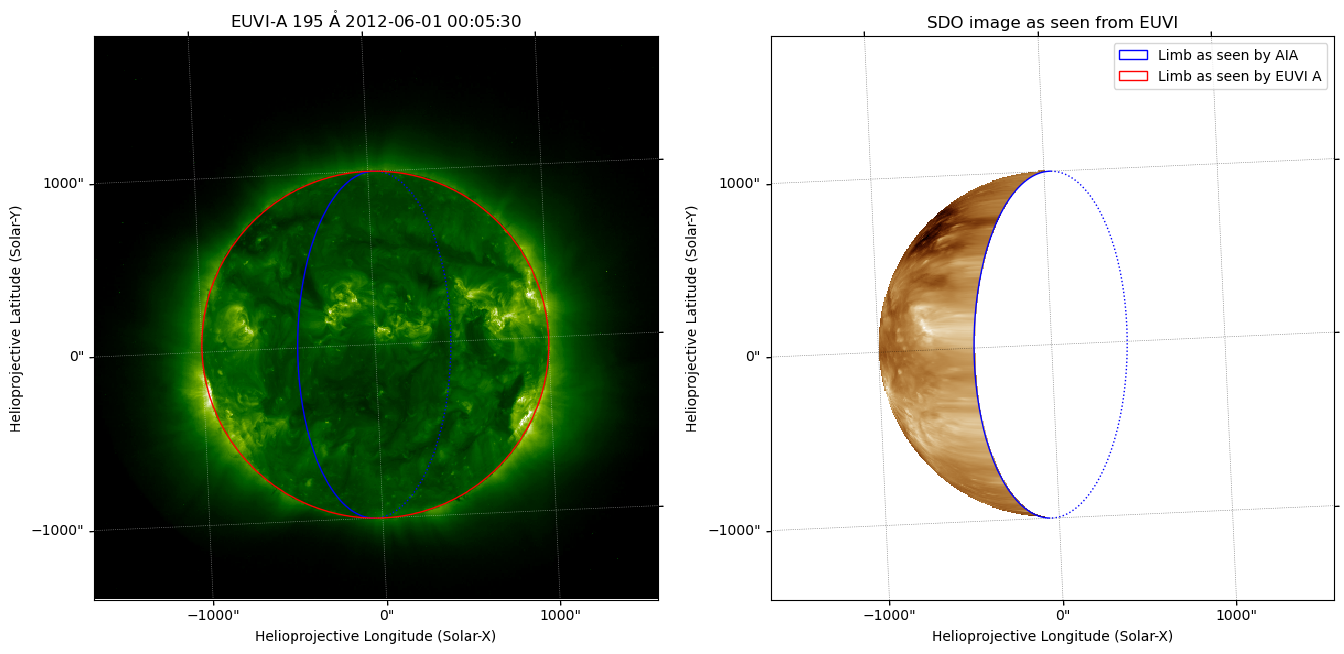

In [2]:
# Idealized developer minutes: 13+?

import matplotlib.pyplot as plt
import reproject

import astropy.units as u
from astropy.coordinates import SkyCoord
from datetime import datetime, timedelta

import sunpy.map
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.net import Fido, attrs as a


# -------- Plot SDO and EUVI images with limbs ----------------------------------------------------------

plt.rcParams['figure.figsize'] = (16, 8)

# To use sample data
# from sunpy.data.sample import AIA_193_JUN2012, STEREO_A_195_JUN2012
# map_list = sunpy.map.Map([AIA_193_JUN2012, STEREO_A_195_JUN2012])  
# map_list.sort(key=lambda m: m.detector)
# map_aia, map_euvi = map_list

# To download the data from source
time_start = "2012-06-01T00:00:00"
time_end =   "2012-06-01T00:05:31"

aia_results = Fido.search(a.Time(time_start, time_end), 
                          a.Instrument('AIA'), 
                          a.Wavelength(193*u.angstrom))

euvi_results = Fido.search(a.Time(time_start, time_end), 
                           a.Instrument('EUVI'),
                           a.Wavelength(195*u.angstrom))

aia_files = Fido.fetch(aia_results[:1])
euvi_files = Fido.fetch(euvi_results[:1])

map_aia = sunpy.map.Map(aia_files[0])
map_euvi = sunpy.map.Map(euvi_files[0])

# We downsample these maps to reduce memory consumption, but you can
# comment this out.
out_shape = (512, 512)
map_aia = map_aia.resample(out_shape * u.pix)
map_euvi = map_euvi.resample(out_shape * u.pix)

fig = plt.figure()

ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1)
map_aia.draw_limb(axes=ax1, color='blue')
map_euvi.draw_limb(axes=ax1, color='red')

ax2 = fig.add_subplot(122, projection=map_euvi)
map_euvi.plot(axes=ax2)
limb_aia = map_aia.draw_limb(axes=ax2, color='blue')
limb_euvi = map_euvi.draw_limb(axes=ax2, color='red')

plt.legend([limb_aia[0], limb_euvi[0]],
           ['Limb as seen by AIA', 'Limb as seen by EUVI A'])


# -------- EUVI image as seen from SDO (orig example) -----------------------------------------------------

# EUVI image as seen from SDO (orig example)
map_euvi.meta['rsun_ref'] = map_aia.meta['rsun_ref']
outmap = map_euvi.reproject_to(map_aia.wcs)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1)
ax2 = fig.add_subplot(122, projection=outmap)
outmap.plot(axes=ax2, title='EUVI image as seen from SDO')
map_euvi.draw_limb(color='red', axes=ax2)

# Set the HPC grid color to black as the background is white
ax2.coords[0].grid_lines_kwargs['edgecolor'] = 'k'
ax2.coords[1].grid_lines_kwargs['edgecolor'] = 'k'

# Add a legend to distinguish the limbs
limb_euvi = map_euvi.draw_limb(axes=ax1, color='red')
limb_aia = map_aia.draw_limb(axes=ax1, color='blue')
plt.legend([limb_aia[0], limb_euvi[0]], ['Limb as seen by AIA', 'Limb as seen by EUVI A'])

plt.show()


# -------- # SDO image as seen from EUVI (remix) -------------------------------------------------------

map_aia.meta['rsun_ref'] = map_euvi.meta['rsun_ref']
outmap = map_aia.reproject_to(map_euvi.wcs)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection=map_euvi)
map_euvi.plot(axes=ax1)
ax2 = fig.add_subplot(122, projection=outmap)
outmap.plot(axes=ax2, title='SDO image as seen from EUVI')
map_aia.draw_limb(color='blue', axes=ax2)

# Set the HPC grid color to black as the background is white
ax2.coords[0].grid_lines_kwargs['edgecolor'] = 'k'
ax2.coords[1].grid_lines_kwargs['edgecolor'] = 'k'

# Add a legend to distinguish the limbs
limb_aia = map_aia.draw_limb(axes=ax1, color='blue')
limb_euvi = map_euvi.draw_limb(axes=ax1, color='red')
plt.legend([limb_aia[0], limb_euvi[0]], ['Limb as seen by AIA', 'Limb as seen by EUVI A'])

plt.show()

#### Task ?: Parker Solar Probe
 - **Description:** ???? something dealing with PSP images & streamers & noise ????
 - **Expected Learning Outcome:** 
 - **Hints:**

In [3]:
from hapiclient import hapi, hapitime2datetime

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data0, meta0 = hapi(server, dataset, parameters, start, stop)
print('data0 = ')
print(data0)

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H2_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data2, meta2 = hapi(server, dataset, parameters, start, stop)
print('\ndata2 = ')
print(data2)

data0 = 
[(b'1998-02-04T00:00:31.000Z', -1.00000000e+31)
 (b'1998-02-04T00:01:35.000Z', -1.00000000e+31)
 (b'1998-02-04T00:02:39.000Z', -1.00000000e+31) ...
 (b'1998-02-05T23:57:19.000Z',  1.44819002e+01)
 (b'1998-02-05T23:58:23.000Z',  1.49483004e+01)
 (b'1998-02-05T23:59:27.000Z',  1.35783005e+01)]

data2 = 
[(b'1998-02-04T00:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T01:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T02:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T03:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T04:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T05:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T06:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T07:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T08:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T09:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T10:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T11:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T12:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T13:00:00.000Z', -1.00000000e+31)
 (b'1998-02-04T1